# Etapa 4: Experimentos adicionais

Esta etapa visa realizar experimentos adicionais a fim de aplicar variações no modelo e compará-los ao final.
Serão realizados 6 experimentos:
- Experimento 1: Fine-tuning do MobileNetV2
- Experimento 2: Variação de dropout
- Experimento 3: Variação de learning rate
- Experimento 4: Variação de batch size
- Experimento 5: Utilização de outra rede - ResNet50
- Experimento 6: Utilização de outra rede - EfficientNetB0

In [10]:
# Importando funções compartilhadas do utils
from utils import build_model, build_generators, plot_history, ModelType

# Importações
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Keras imports
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2, ResNet50, EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [11]:
# Definição de caminhos
DATA_DIR = "../data/FairFace"
SPLITS_DIR = "../splits"
MODEL_SAVE_DIR = "../models"
WEIGHTS_PATH = "../weights/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5"

# Definição de parâmetros comuns (os mesmos do modelo base)
IMG_SIZE = (224, 224)
EPOCHS = 10
BATCH_SIZE = 32
LEARNING_RATE = 1e-4

# Carregar CSVs com splits processados
df_train = pd.read_csv(os.path.join(SPLITS_DIR, "train_split.csv"))
df_val = pd.read_csv(os.path.join(SPLITS_DIR, "val_split.csv"))
df_train['label'] = df_train['label'].astype(str)
df_val['label'] = df_val['label'].astype(str)
NUM_CLASSES = df_train['label'].nunique()

In [12]:
# Geradores do mobilenetv2
mobilenet_train_gen, mobilenet_val_gen = build_generators(df_train, df_val, DATA_DIR, IMG_SIZE, BATCH_SIZE, mobilenet_preprocess)

Found 73386 validated image filenames belonging to 9 classes.
Found 12951 validated image filenames belonging to 9 classes.


# Experimento 1: **Fine-tuning** do MobileNetV2

Epoch 1/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 402s 174ms/step - accuracy: 0.3542 - loss: 1.6396 - val_accuracy: 0.4450 - val_loss: 1.3708
Epoch 2/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 378s 165ms/step - accuracy: 0.4683 - loss: 1.2902 - val_accuracy: 0.4495 - val_loss: 1.4066
Epoch 3/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 374s 163ms/step - accuracy: 0.5184 - loss: 1.1630 - val_accuracy: 0.4750 - val_loss: 1.2411
Epoch 4/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 375s 163ms/step - accuracy: 0.5483 - loss: 1.0771 - val_accuracy: 0.4512 - val_loss: 1.3498
Epoch 5/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 372s 162ms/step - accuracy: 0.5820 - loss: 0.9853 - val_accuracy: 0.4721 - val_loss: 1.3052
Epoch 6/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 374s 163ms/step - accuracy: 0.6217 - loss: 0.8933 - val_accuracy: 0.4726 - val_loss: 1.3814
Epoch 7/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 366s 159ms/step - accuracy: 0.6563 - loss: 0.8095 - val_accuracy: 0.4401 - val_loss: 1.6130
Epoch 8/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 375s 164ms/step - ac

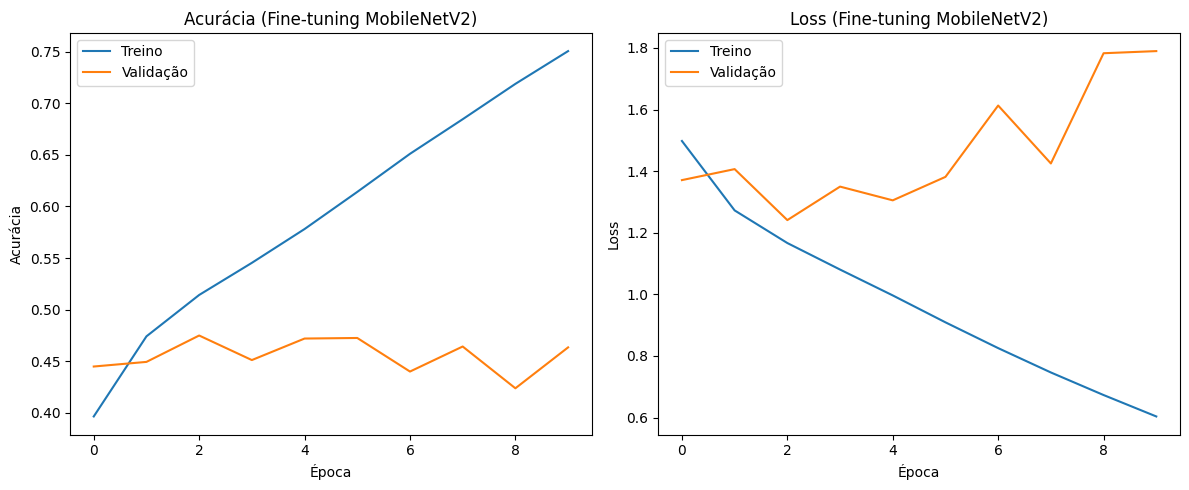

In [13]:
# Construção do modelo
fine_tuned_model = build_model(
    model_type=ModelType.MOBILENET,
    input_shape=IMG_SIZE,
    num_classes=NUM_CLASSES,
    dropout_rate=0.5,
    fine_tune_at=-20
)

fine_tuned_model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Treinar modelo
finetuned_history = fine_tuned_model.fit(
    mobilenet_train_gen,
    validation_data=mobilenet_val_gen,
    epochs=EPOCHS
)

# Salvar modelo
fine_tuned_model.save(os.path.join(MODEL_SAVE_DIR, "mobilenetv2_finetuned.keras"))

# Verificar resultados
plot_history(finetuned_history, title_suffix="(Fine-tuning MobileNetV2)")

# Experimento 2: MobileNetV2 com variação de **Dropout (0.2)**

Epoch 1/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 317s 137ms/step - accuracy: 0.3194 - loss: 1.7468 - val_accuracy: 0.3829 - val_loss: 1.5273
Epoch 2/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 313s 136ms/step - accuracy: 0.3812 - loss: 1.5319 - val_accuracy: 0.3957 - val_loss: 1.4843
Epoch 3/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 297s 130ms/step - accuracy: 0.4015 - loss: 1.4808 - val_accuracy: 0.4050 - val_loss: 1.4685
Epoch 4/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 289s 126ms/step - accuracy: 0.4089 - loss: 1.4539 - val_accuracy: 0.4051 - val_loss: 1.4546
Epoch 5/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 288s 126ms/step - accuracy: 0.4189 - loss: 1.4297 - val_accuracy: 0.4103 - val_loss: 1.4562
Epoch 6/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 285s 124ms/step - accuracy: 0.4301 - loss: 1.4051 - val_accuracy: 0.4092 - val_loss: 1.4430
Epoch 7/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 288s 125ms/step - accuracy: 0.4377 - loss: 1.3911 - val_accuracy: 0.4128 - val_loss: 1.4363
Epoch 8/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 287s 125ms/step - ac

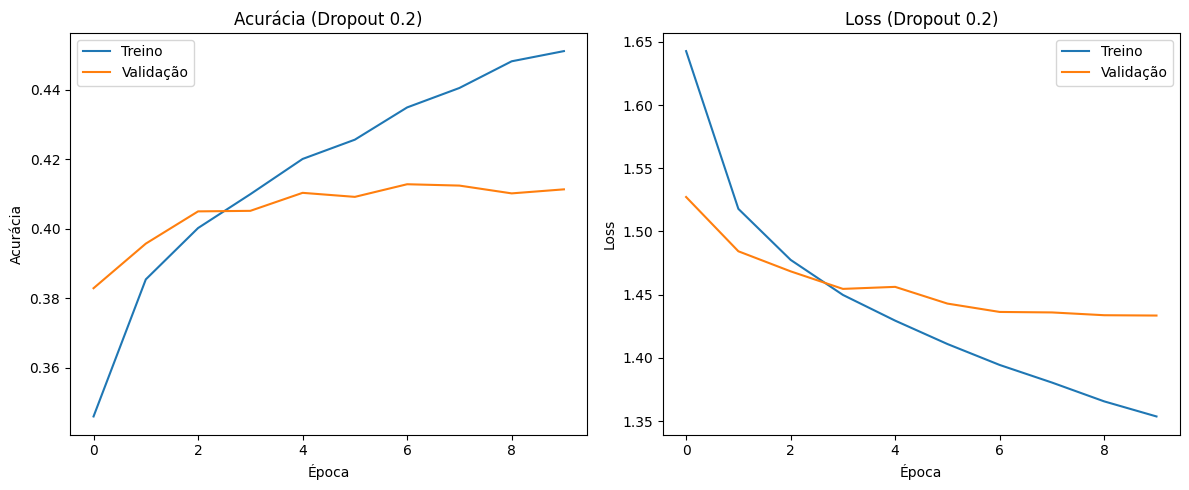

In [14]:
# Construção do modelo
dropout_model = build_model(ModelType.MOBILENET, IMG_SIZE, NUM_CLASSES, dropout_rate=0.2)
fine_tuned_model = build_model(
    model_type=ModelType.MOBILENET,
    input_shape=IMG_SIZE,
    num_classes=NUM_CLASSES,
    dropout_rate=0.5,
    fine_tune_at=-20
)

dropout_model.compile(
  optimizer=Adam(learning_rate=LEARNING_RATE),
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

# Treinar modelo
dropout_history = dropout_model.fit(
  mobilenet_train_gen,
  validation_data=mobilenet_val_gen,
  epochs=EPOCHS
)

# Salvar modelo
dropout_model.save(os.path.join(MODEL_SAVE_DIR, "mobilenetv2_dropout02.keras"))

# Verificar resultados
plot_history(dropout_history, title_suffix="(Dropout 0.2)")

# Experimento 3: MobileNetV2 com variação de **learning rate (1e-3)**

Epoch 1/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 313s 136ms/step - accuracy: 0.3279 - loss: 1.7072 - val_accuracy: 0.3830 - val_loss: 1.5116
Epoch 2/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 303s 132ms/step - accuracy: 0.3731 - loss: 1.5489 - val_accuracy: 0.3982 - val_loss: 1.4745
Epoch 3/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 311s 136ms/step - accuracy: 0.3835 - loss: 1.5193 - val_accuracy: 0.3943 - val_loss: 1.4740
Epoch 4/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 313s 136ms/step - accuracy: 0.3836 - loss: 1.5119 - val_accuracy: 0.3968 - val_loss: 1.4657
Epoch 5/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 309s 135ms/step - accuracy: 0.3872 - loss: 1.4984 - val_accuracy: 0.4013 - val_loss: 1.4617
Epoch 6/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 312s 136ms/step - accuracy: 0.3925 - loss: 1.4851 - val_accuracy: 0.4029 - val_loss: 1.4554
Epoch 7/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 316s 138ms/step - accuracy: 0.3879 - loss: 1.4883 - val_accuracy: 0.4027 - val_loss: 1.4532
Epoch 8/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 311s 135ms/step - ac

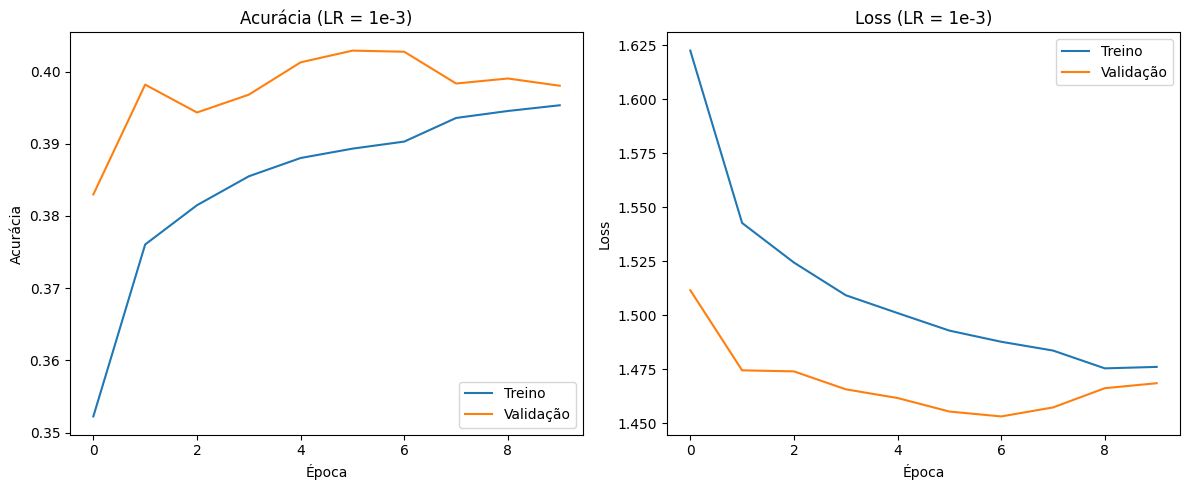

In [ ]:
# Construção do modelo
learning_rate_model = build_model(ModelType.MOBILENET, IMG_SIZE, NUM_CLASSES, dropout_rate=0.5)
learning_rate_model.compile(
  optimizer=Adam(learning_rate=1e-3),
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

# Treinar modelo
learning_rate_history = learning_rate_model.fit(
  mobilenet_train_gen,
  validation_data=mobilenet_val_gen,
  epochs=EPOCHS
)

# Salvar modelo
learning_rate_model.save(os.path.join(MODEL_SAVE_DIR, "mobilenetv2_lr1e3.keras"))

# Verificar resultados
plot_history(learning_rate_history, title_suffix="(LR = 1e-3)")

# Experimento 4: MobileNetV2 com variação de **Batch Size 64**

Epoch 1/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 311s 135ms/step - accuracy: 0.3024 - loss: 1.8285 - val_accuracy: 0.3738 - val_loss: 1.5541
Epoch 2/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 310s 135ms/step - accuracy: 0.3586 - loss: 1.5990 - val_accuracy: 0.3880 - val_loss: 1.5055
Epoch 3/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 295s 129ms/step - accuracy: 0.3804 - loss: 1.5444 - val_accuracy: 0.3959 - val_loss: 1.4855
Epoch 4/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 308s 134ms/step - accuracy: 0.3913 - loss: 1.5118 - val_accuracy: 0.4001 - val_loss: 1.4726
Epoch 5/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 296s 129ms/step - accuracy: 0.3967 - loss: 1.4934 - val_accuracy: 0.3994 - val_loss: 1.4644
Epoch 6/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 297s 129ms/step - accuracy: 0.4015 - loss: 1.4797 - val_accuracy: 0.4030 - val_loss: 1.4572
Epoch 7/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 325s 142ms/step - accuracy: 0.4116 - loss: 1.4599 - val_accuracy: 0.4027 - val_loss: 1.4504
Epoch 8/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 306s 133ms/step - ac

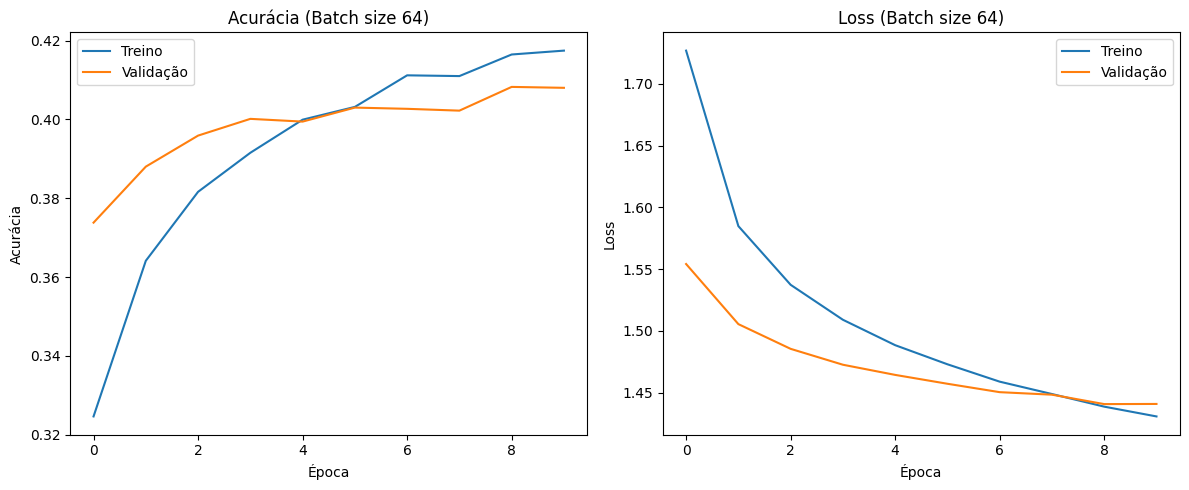

In [16]:
# Construção do modelo
bs64_model = build_model(ModelType.MOBILENET, IMG_SIZE, NUM_CLASSES, dropout_rate=0.5)
bs64_model.compile(
  optimizer=Adam(learning_rate=LEARNING_RATE),
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

# Treinar o modelo
bs64_history = bs64_model.fit(
  mobilenet_train_gen,
  validation_data=mobilenet_val_gen,
  epochs=EPOCHS
)

# Salvar o modelo
bs64_model.save(os.path.join(MODEL_SAVE_DIR, "mobilenetv2_bs64.keras"))

# Verificar resultados
plot_history(bs64_history, title_suffix="(Batch size 64)")

# Experimento 5: Utilização da rede **ResNet50**

Como esta rede possui uma nova arquitetura, precisaremos definir novos geradores.

Found 73386 validated image filenames belonging to 9 classes.
Found 12951 validated image filenames belonging to 9 classes.
Epoch 1/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 1029s 447ms/step - accuracy: 0.3231 - loss: 1.7586 - val_accuracy: 0.4125 - val_loss: 1.4339
Epoch 2/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 1003s 437ms/step - accuracy: 0.4007 - loss: 1.4840 - val_accuracy: 0.4308 - val_loss: 1.3893
Epoch 3/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 1078s 470ms/step - accuracy: 0.4191 - loss: 1.4263 - val_accuracy: 0.4344 - val_loss: 1.3602
Epoch 4/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 1269s 553ms/step - accuracy: 0.4330 - loss: 1.3821 - val_accuracy: 0.4421 - val_loss: 1.3411
Epoch 5/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 1047s 456ms/step - accuracy: 0.4378 - loss: 1.3699 - val_accuracy: 0.4428 - val_loss: 1.3284
Epoch 6/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 1079s 470ms/step - accuracy: 0.4471 - loss: 1.3427 - val_accuracy: 0.4441 - val_loss: 1.3186
Epoch 7/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 1052s 458ms/step - accur

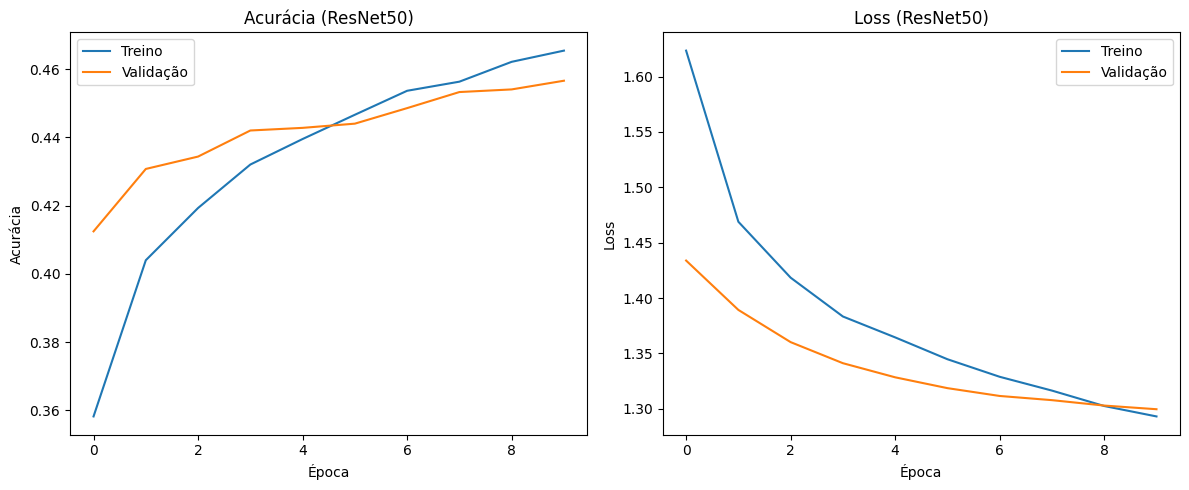

In [17]:
resnet_train_gen, resnet_val_gen = build_generators(df_train, df_val, DATA_DIR, IMG_SIZE, BATCH_SIZE, resnet_preprocess)

# Construção do modelo
resnet_model = build_model(ModelType.RESNET, IMG_SIZE, NUM_CLASSES, dropout_rate=0.5)
resnet_model.compile(
  optimizer=Adam(learning_rate=LEARNING_RATE),
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

# Treinamento do modelo
resnet_history = resnet_model.fit(
  resnet_train_gen,
  validation_data=resnet_val_gen,
  epochs=EPOCHS
)

# Salvar modelo
resnet_model.save(os.path.join(MODEL_SAVE_DIR, "resnet50.keras"))

# Verificar resultados
plot_history(resnet_history, title_suffix="(ResNet50)")

# Experimento 6: Utilização da rede **EfficientNetB0**

Found 73386 validated image filenames belonging to 9 classes.
Found 12951 validated image filenames belonging to 9 classes.
Epoch 1/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 472s 205ms/step - accuracy: 0.3206 - loss: 1.7665 - val_accuracy: 0.3972 - val_loss: 1.4852
Epoch 2/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 459s 200ms/step - accuracy: 0.3876 - loss: 1.5326 - val_accuracy: 0.4125 - val_loss: 1.4357
Epoch 3/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 445s 194ms/step - accuracy: 0.4012 - loss: 1.4804 - val_accuracy: 0.4186 - val_loss: 1.4067
Epoch 4/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 443s 193ms/step - accuracy: 0.4146 - loss: 1.4487 - val_accuracy: 0.4227 - val_loss: 1.3919
Epoch 5/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 446s 194ms/step - accuracy: 0.4200 - loss: 1.4231 - val_accuracy: 0.4299 - val_loss: 1.3788
Epoch 6/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 448s 195ms/step - accuracy: 0.4251 - loss: 1.4090 - val_accuracy: 0.4302 - val_loss: 1.3697
Epoch 7/10
2294/2294 ━━━━━━━━━━━━━━━━━━━━ 449s 196ms/step - accuracy: 0.

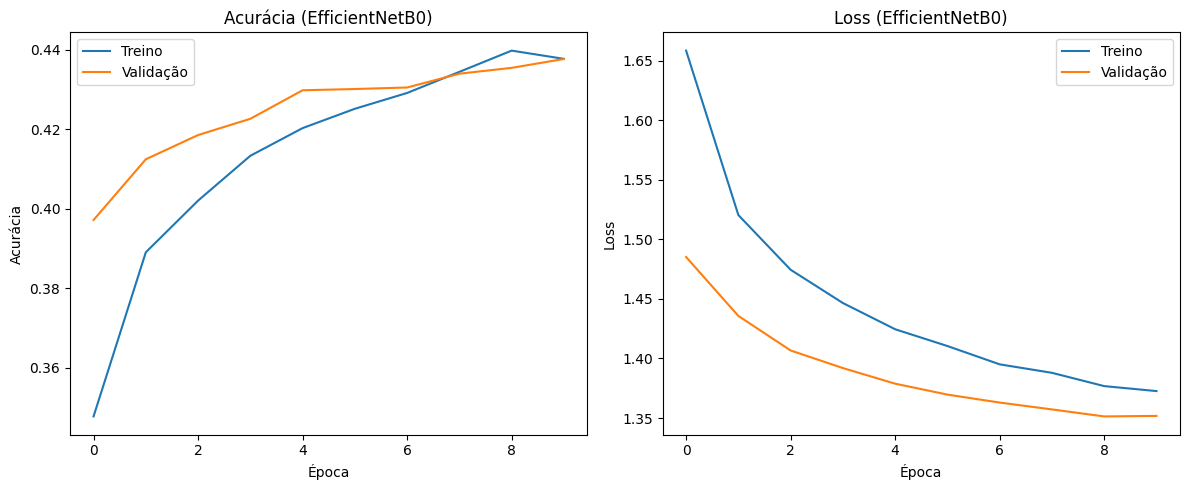

In [18]:
# Definição dos geradores
efficientnet_train_gen, efficientnet_val_gen = build_generators(df_train, df_val, DATA_DIR, IMG_SIZE, BATCH_SIZE, efficientnet_preprocess)

# Construção do modelo
efficientnet_model = build_model(ModelType.EFFICIENTNET, IMG_SIZE, NUM_CLASSES)
efficientnet_model.compile(
  optimizer=Adam(learning_rate=LEARNING_RATE),
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

# Treinamento do modelo
efficientnet_history = efficientnet_model.fit(
  efficientnet_train_gen,
  validation_data=efficientnet_val_gen,
  epochs=EPOCHS
)

# Salvar modelo
efficientnet_model.save(os.path.join(MODEL_SAVE_DIR, "efficientnetb0.keras"))

# Verificar resultados
plot_history(efficientnet_history, title_suffix="(EfficientNetB0)")

In [23]:
# Salvando history de todos os modelos para avaliação posterior

import pickle

# MobileNetV2 Fine-tuning
with open("../models/history/finetuned_history.pkl", "wb") as f:
    pickle.dump(finetuned_history.history, f)

# MobileNetV2 Dropout 0.2
with open("../models/history/dropout02_history.pkl", "wb") as f:
    pickle.dump(dropout_history.history, f)

# MobileNetV2 Learning Rate 1e-3
with open("../models/history/lr1e3_history.pkl", "wb") as f:
    pickle.dump(learning_rate_history.history, f)

# MobileNetV2 Batch Size 64
with open("../models/history/bs64_history.pkl", "wb") as f:
    pickle.dump(bs64_history.history, f)

# ResNet50
with open("../models/history/resnet50_history.pkl", "wb") as f:
    pickle.dump(resnet_history.history, f)

# EfficientNetB0
with open("../models/history/efficientnetb0_history.pkl", "wb") as f:
    pickle.dump(efficientnet_history.history, f)